# New Blog Who Dis?
> We are going to publish things to the internet with Python and R in Jupyter Notebooks.

- toc:true
- branch: master
- badges: true
- comments: true
- author: John Tyler and the Magentic Dark Clowns
- categories: [fastpages, jupyter]


#### Testing writing a post from scratch.

The goals of this test are the following:
1. Can I connect to GCP/BigQuery to pull data into the notebook? **Yes**
2. How does the formatting look once published? Is it acceptable? **Yes, and you can hide sensitive code**
3. What happens if there are open comments on the notebook when published? Do they show? **They remain in Deepnotes, but don't show in the blog post.**
4. How can I more effectively save a post here and publish to the appropriate file location on GitHub for Fastpages? Can I save directly? And does the publishing action on GitHub fire automatically? **Deepnote can sync with GitHub. Additional folders/files not in the Fastpages file schema don't seem to be able to be puhed. The GitHub Actions fire automatically to update the posts. **

In [1]:
{
    "tags": [
        "hide_input",
    ]
}

import json
import os
from google.oauth2 import service_account
from google.cloud import bigquery

bq_credentials = service_account.Credentials.from_service_account_info(
    json.loads(os.environ['MAPCHANGE_BIGQUERY_CONNECTION_SERVICE_ACCOUNT']))
client = bigquery.Client(credentials=bq_credentials, 
    project=bq_credentials.project_id)

In [2]:


df_1 = _deepnote_execute_sql("""{
    "tags": [
        "hide_input",
    ]
}

select election_cycle, sum(dem_predicted)
from `nyu-cap-ae.final.tableau_final_market`
group by 1
limit 100;
""", 'SQL_A68E38DE_5115_4DF4_BA9E_46073050F7D2')
df_1

,election_cycle,f0_
0,2018,2348452.0
1,2020,2152852.0
2,2016,1833835.0
3,2022,3461406.0


There is supposed to be a built in visualization that shows below, but it doesn't work with Fastpages. Could be useful for quick and dirty adhoc visualizations in Deepnote while exploring data though. 

In [3]:
_deepnote_run_altair(df_1, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"election_cycle","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"f0_","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"f0_","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Unfortunately, it doesn't work because fastpages doesn't recognize this command: 

`_deepnote_run_altair(df_1, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"election_cycle","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"f0_","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"f0_","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}}}}""")`

Since that doesn't work, let's try using matplotlib

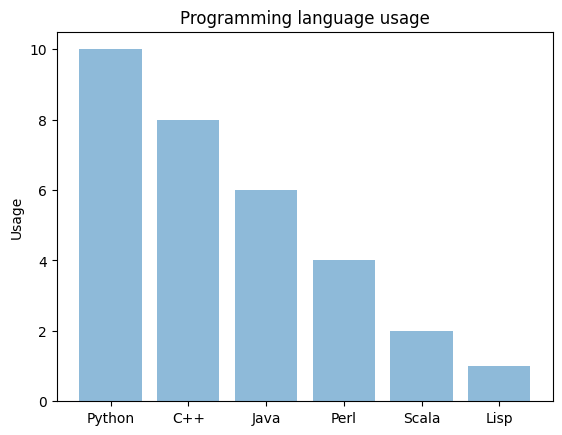

In [4]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

Yay, now it works!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=172ea2db-8610-40fc-a42a-434c8b873b4c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>